In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import operator
from sklearn import metrics

In [ ]:
# Fungsi Eval
def eval(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'MAD : {round(metrics.mean_absolute_error(y_true, y_pred),2)}')
    print(f'MAPE : {round(mean_absolute_percentage_error(y_true, y_pred),2)}')

# Fungsi b
def B(X, Y):
  b_atas = (len(X)*sum(X*Y)) - (sum(X)*sum(Y))
  b_bawah = len(X)*sum(X**2) - (sum(X)**2)
  b = b_atas / b_bawah
  return b

# Fungsi a  
def A(X, Y, B):
  a_atas = (sum(Y)) - (B*sum(X))
  a_bawah = len(X)
  a = a_atas / a_bawah
  return a

# Fungsi Indeks Musim
def im(Y1, Y2, rata):
  indeks_musim = []
  for i in range(12):
    indeks_musim.append((Y1[i] + Y2[i])/2/rata)
  return indeks_musim

# Fungsi prediksi tanpa indeks musim
def prediksi(X,a,b):
  Y_pred=[]
  for i in X:
    Y_pred.append(a+b*i)
  return Y_pred

# Fungsi prediksi dengan indeks musim
def prediksi_im(Y_pred, im):
  Y_pred_final=[]
  for i in range(7):
    Y_pred_final.append(round(Y_pred[i]*im[i]))
  return Y_pred_final

# Fungsi prediksi 2022 dengan indeks musim
def prediksi2022_im(Y_pred, im):
  Y_pred_final=[]
  for i in range(12):
    Y_pred_final.append(round(Y_pred[i]*im[i]))
  return Y_pred_final

In [ ]:
df = pd.read_csv("produk_tiap_bulan.csv")
df

,bulan,tahun,indeks_waktu,qty_apsdk,qty_ast,qty_eg,qty_gc,qty_jnk,qty_kp,qty_ka,qty_os,qty_sa
0,1,2020,0,592,165,91,50,5,2,65,17,120
1,2,2020,1,572,618,213,51,11,32,64,5,36
2,3,2020,2,312,486,30,89,2,110,16,9,27
3,4,2020,3,161,199,30,79,27,104,8,16,36
4,5,2020,4,347,493,60,20,2,64,63,8,35
5,6,2020,5,110,164,266,48,8,56,82,7,4
6,7,2020,6,159,264,175,38,27,50,164,5,61
7,8,2020,7,231,149,19,41,13,51,140,10,82
8,9,2020,8,311,230,17,82,6,85,201,9,52
9,10,2020,9,70,16,14,27,11,26,106,3,24


In [ ]:
df['qty_dummy_a'] = [104,108,103,105,104,102,107,110,102,105,110,102,106,107,105,104,101,109,107,105,102,103,108,100]
df['qty_dummy_b'] = [110,109,108,106,104,102,102,101,100,99,97,96,96,95,93,92,90,90,89,87,86,85,83,81]
df['qty_dummy_c'] = [201,199,198,195,174,172,172,149,148,146,144,140,115,115,113,110,109,108,108,105,90,88,85,81]
df

,bulan,tahun,indeks_waktu,qty_apsdk,qty_ast,qty_eg,qty_gc,qty_jnk,qty_kp,qty_ka,qty_os,qty_sa,qty_dummy_a,qty_dummy_b,qty_dummy_c
0,1,2020,0,592,165,91,50,5,2,65,17,120,104,110,201
1,2,2020,1,572,618,213,51,11,32,64,5,36,108,109,199
2,3,2020,2,312,486,30,89,2,110,16,9,27,103,108,198
3,4,2020,3,161,199,30,79,27,104,8,16,36,105,106,195
4,5,2020,4,347,493,60,20,2,64,63,8,35,104,104,174
5,6,2020,5,110,164,266,48,8,56,82,7,4,102,102,172
6,7,2020,6,159,264,175,38,27,50,164,5,61,107,102,172
7,8,2020,7,231,149,19,41,13,51,140,10,82,110,101,149
8,9,2020,8,311,230,17,82,6,85,201,9,52,102,100,148
9,10,2020,9,70,16,14,27,11,26,106,3,24,105,99,146


## apron pupuk sponge dop kuning


In [ ]:
df_apsdk = df[['bulan','tahun','indeks_waktu','qty_apsdk']]
df_apsdk

,bulan,tahun,indeks_waktu,qty_apsdk
0,1,2020,0,592
1,2,2020,1,572
2,3,2020,2,312
3,4,2020,3,161
4,5,2020,4,347
5,6,2020,5,110
6,7,2020,6,159
7,8,2020,7,231
8,9,2020,8,311
9,10,2020,9,70


In [ ]:
X = df_apsdk['indeks_waktu'].values
Y = df_apsdk['qty_apsdk'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.4080560420315236,
 1.3292469352014011,
 1.5936952714535901,
 1.0980735551663747,
 0.8231173380035026,
 0.702276707530648,
 0.9159369527145359,
 0.5376532399299475,
 1.3345008756567425,
 0.5989492119089317,
 1.4448336252189142,
 0.2136602451838879]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

347.7647058823529
-7.301470588235294


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[223.63970588235293,
 216.33823529411762,
 209.03676470588235,
 201.73529411764704,
 194.43382352941174,
 187.13235294117646,
 179.83088235294116]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[157, 198, 112, 269, 116, 270, 38]

In [ ]:
df_test = df_apsdk[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-162-b3931e74d41d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_apsdk,qty_pred
17,6,2021,17,291,157
18,7,2021,18,364,198
19,8,2021,19,76,112
20,9,2021,20,451,269
21,10,2021,21,272,116
22,11,2021,22,439,270
23,12,2021,23,40,38


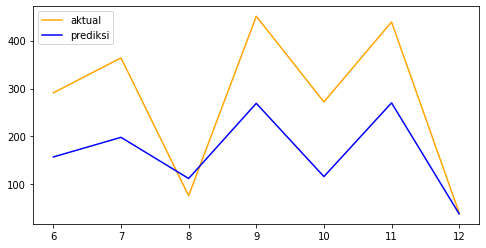

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-164-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-164-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_apsdk,qty_pred,ad,ape
17,6,2021,17,291,157,134,46.05
18,7,2021,18,364,198,166,45.60
19,8,2021,19,76,112,36,47.37
20,9,2021,20,451,269,182,40.35
21,10,2021,21,272,116,156,57.35
22,11,2021,22,439,270,169,38.50
23,12,2021,23,40,38,2,5.00


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 120.71
MAPE : 40.03


## apron semprot taslan


In [ ]:
df_ast = df[['bulan','tahun','indeks_waktu','qty_ast']]
df_ast

,bulan,tahun,indeks_waktu,qty_ast
0,1,2020,0,165
1,2,2020,1,618
2,3,2020,2,486
3,4,2020,3,199
4,5,2020,4,493
5,6,2020,5,164
6,7,2020,6,264
7,8,2020,7,149
8,9,2020,8,230
9,10,2020,9,16


In [ ]:
X = df_ast['indeks_waktu'].values
Y = df_ast['qty_ast'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.45100671140939597,
 1.8738255033557047,
 1.476510067114094,
 0.6425055928411633,
 0.9610738255033557,
 0.7695749440715883,
 1.138255033557047,
 0.7463087248322148,
 2.1369127516778526,
 0.9199105145413871,
 0.6478747203579418,
 0.23624161073825503]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

360.4117647058824
-14.904411764705882


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[107.03676470588238,
 92.13235294117652,
 77.22794117647061,
 62.32352941176475,
 47.41911764705884,
 32.514705882352985,
 17.610294117647072]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[82, 105, 58, 133, 44, 21, 4]

In [ ]:
df_test = df_ast[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-173-a6d45689553b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_ast,qty_pred
17,6,2021,17,266,82
18,7,2021,18,372,105
19,8,2021,19,268,58
20,9,2021,20,964,133
21,10,2021,21,498,44
22,11,2021,22,193,21
23,12,2021,23,44,4


In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-174-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-174-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_ast,qty_pred,ad,ape
17,6,2021,17,266,82,184,69.17
18,7,2021,18,372,105,267,71.77
19,8,2021,19,268,58,210,78.36
20,9,2021,20,964,133,831,86.20
21,10,2021,21,498,44,454,91.16
22,11,2021,22,193,21,172,89.12
23,12,2021,23,44,4,40,90.91


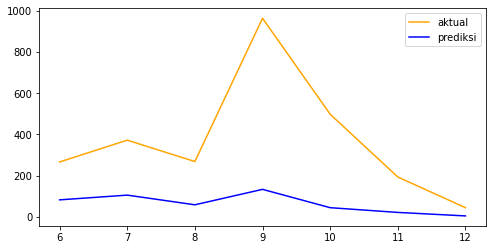

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 308.29
MAPE : 82.39


## earplug gosave


In [ ]:
df_eg = df[['bulan','tahun','indeks_waktu','qty_eg']]
df_eg

,bulan,tahun,indeks_waktu,qty_eg
0,1,2020,0,91
1,2,2020,1,213
2,3,2020,2,30
3,4,2020,3,30
4,5,2020,4,60
5,6,2020,5,266
6,7,2020,6,175
7,8,2020,7,19
8,9,2020,8,17
9,10,2020,9,14


In [ ]:
X = df_eg['indeks_waktu'].values
Y = df_eg['qty_eg'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.4855093256814921,
 0.8677187948350071,
 0.20659971305595407,
 0.24103299856527977,
 0.41319942611190813,
 1.4703012912482065,
 1.594261119081779,
 3.012912482065997,
 0.9124820659971306,
 0.988235294117647,
 0.5371592539454806,
 1.2705882352941176]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

118.43137254901961
-5.870098039215686


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[18.639705882352942,
 12.769607843137265,
 6.899509803921575,
 1.029411764705884,
 -4.8406862745097925,
 -10.710784313725497,
 -16.58088235294116]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[27, 20, 21, 1, -5, -6, -21]

In [ ]:
df_test = df_eg[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-184-a77b029c7b5e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_eg,qty_pred
17,6,2021,17,161,27
18,7,2021,18,288,20
19,8,2021,19,856,21
20,9,2021,20,248,1
21,10,2021,21,273,-5
22,11,2021,22,125,-6
23,12,2021,23,319,-21


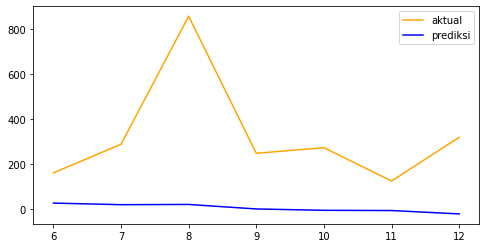

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-186-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-186-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_eg,qty_pred,ad,ape
17,6,2021,17,161,27,134,83.23
18,7,2021,18,288,20,268,93.06
19,8,2021,19,856,21,835,97.55
20,9,2021,20,248,1,247,99.60
21,10,2021,21,273,-5,278,101.83
22,11,2021,22,125,-6,131,104.80
23,12,2021,23,319,-21,340,106.58


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 319.0
MAPE : 98.09


## garu cangkul


In [ ]:
df_gc = df[['bulan','tahun','indeks_waktu','qty_gc']]
df_gc

,bulan,tahun,indeks_waktu,qty_gc
0,1,2020,0,50
1,2,2020,1,51
2,3,2020,2,89
3,4,2020,3,79
4,5,2020,4,20
5,6,2020,5,48
6,7,2020,6,38
7,8,2020,7,41
8,9,2020,8,82
9,10,2020,9,27


In [ ]:
X = df_gc['indeks_waktu'].values
Y = df_gc['qty_gc'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.9636711281070746,
 0.6883365200764818,
 1.0669216061185467,
 1.3537284894837476,
 0.6653919694072657,
 2.1338432122370934,
 0.8374760994263862,
 0.49330783938814526,
 1.7667304015296366,
 1.0095602294455066,
 0.27533460803059273,
 0.7456978967495219]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

62.313725490196084
-2.8333333333333335


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[14.147058823529413,
 11.313725490196084,
 8.480392156862749,
 5.647058823529413,
 2.8137254901960844,
 -0.01960784313725128,
 -2.852941176470587]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[30, 9, 4, 10, 3, 0, -2]

In [ ]:
df_test = df_gc[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-195-f2e5d5ba94d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_gc,qty_pred
17,6,2021,17,138,30
18,7,2021,18,35,9
19,8,2021,19,2,4
20,9,2021,20,72,10
21,10,2021,21,61,3
22,11,2021,22,11,0
23,12,2021,23,53,-2


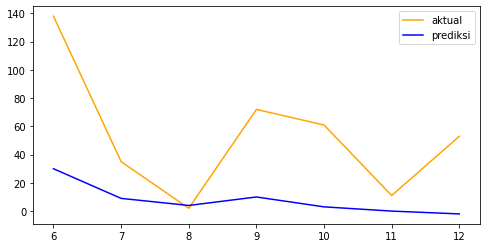

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-197-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-197-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_gc,qty_pred,ad,ape
17,6,2021,17,138,30,108,78.26
18,7,2021,18,35,9,26,74.29
19,8,2021,19,2,4,2,100.00
20,9,2021,20,72,10,62,86.11
21,10,2021,21,61,3,58,95.08
22,11,2021,22,11,0,11,100.00
23,12,2021,23,53,-2,55,103.77


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 46.0
MAPE : 91.07


## jet nozzle - kuningan - 2.5_


In [ ]:
df_jnk = df[['bulan','tahun','indeks_waktu','qty_jnk']]
df_jnk

,bulan,tahun,indeks_waktu,qty_jnk
0,1,2020,0,5
1,2,2020,1,11
2,3,2020,2,2
3,4,2020,3,27
4,5,2020,4,2
5,6,2020,5,8
6,7,2020,6,27
7,8,2020,7,13
8,9,2020,8,6
9,10,2020,9,11


In [ ]:
X = df_jnk['indeks_waktu'].values
Y = df_jnk['qty_jnk'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.9357798165137614,
 0.38532110091743116,
 0.9357798165137614,
 1.128440366972477,
 0.38532110091743116,
 0.9633027522935779,
 2.477064220183486,
 2.036697247706422,
 0.5779816513761468,
 1.1009174311926604,
 0.8807339449541284,
 0.19266055045871558]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

9.098039215686276
0.5465686274509803


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[18.389705882352942,
 18.936274509803923,
 19.482843137254903,
 20.029411764705884,
 20.575980392156865,
 21.122549019607845,
 21.669117647058826]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[18, 47, 40, 12, 23, 19, 4]

In [ ]:
df_test = df_jnk[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-206-4c2097c3f013>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_jnk,qty_pred
17,6,2021,17,27,18
18,7,2021,18,63,47
19,8,2021,19,61,40
20,9,2021,20,15,12
21,10,2021,21,29,23
22,11,2021,22,9,19
23,12,2021,23,3,4


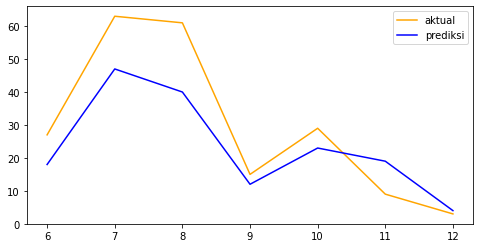

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-208-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-208-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_jnk,qty_pred,ad,ape
17,6,2021,17,27,18,9,33.33
18,7,2021,18,63,47,16,25.40
19,8,2021,19,61,40,21,34.43
20,9,2021,20,15,12,3,20.00
21,10,2021,21,29,23,6,20.69
22,11,2021,22,9,19,10,111.11
23,12,2021,23,3,4,1,33.33


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 9.43
MAPE : 39.76


## kapak pulaski


In [ ]:
df_kp = df[['bulan','tahun','indeks_waktu','qty_kp']]
df_kp

,bulan,tahun,indeks_waktu,qty_kp
0,1,2020,0,2
1,2,2020,1,32
2,3,2020,2,110
3,4,2020,3,104
4,5,2020,4,64
5,6,2020,5,56
6,7,2020,6,50
7,8,2020,7,51
8,9,2020,8,85
9,10,2020,9,26


In [ ]:
X = df_kp['indeks_waktu'].values
Y = df_kp['qty_kp'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[0.3341772151898734,
 0.830379746835443,
 1.3974683544303796,
 1.4379746835443037,
 1.0227848101265822,
 1.9037974683544303,
 0.9316455696202531,
 0.5772151898734177,
 1.0430379746835443,
 1.589873417721519,
 0.5164556962025316,
 0.4151898734177215]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

62.35294117647059
-1.9191176470588236


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[29.727941176470587,
 27.80882352941176,
 25.889705882352942,
 23.970588235294116,
 22.05147058823529,
 20.13235294117647,
 18.213235294117645]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[57, 26, 15, 25, 35, 10, 8]

In [ ]:
df_test = df_kp[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-217-af74557e0177>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_kp,qty_pred
17,6,2021,17,132,57
18,7,2021,18,42,26
19,8,2021,19,6,15
20,9,2021,20,18,25
21,10,2021,21,131,35
22,11,2021,22,28,10
23,12,2021,23,29,8


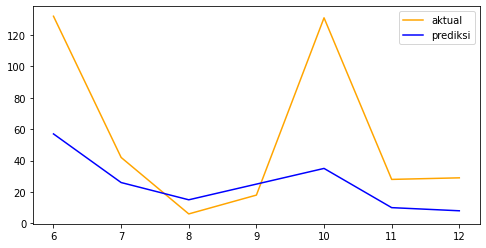

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-219-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-219-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_kp,qty_pred,ad,ape
17,6,2021,17,132,57,75,56.82
18,7,2021,18,42,26,16,38.10
19,8,2021,19,6,15,9,150.00
20,9,2021,20,18,25,7,38.89
21,10,2021,21,131,35,96,73.28
22,11,2021,22,28,10,18,64.29
23,12,2021,23,29,8,21,72.41


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 34.57
MAPE : 70.54


## kepyok api


In [ ]:
df_ka = df[['bulan','tahun','indeks_waktu','qty_ka']]
df_ka

,bulan,tahun,indeks_waktu,qty_ka
0,1,2020,0,65
1,2,2020,1,64
2,3,2020,2,16
3,4,2020,3,8
4,5,2020,4,63
5,6,2020,5,82
6,7,2020,6,164
7,8,2020,7,140
8,9,2020,8,201
9,10,2020,9,106


In [ ]:
X = df_ka['indeks_waktu'].values
Y = df_ka['qty_ka'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.183723797780518,
 1.0801479654747226,
 0.3921085080147966,
 0.5252774352651048,
 0.9173859432799014,
 0.8581997533908755,
 1.5166461159062887,
 1.4056720098643651,
 1.6128236744759556,
 1.2281134401972873,
 0.6140567200986436,
 0.6658446362515413]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

74.41176470588235
0.6617647058823529


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[85.66176470588235,
 86.3235294117647,
 86.98529411764706,
 87.6470588235294,
 88.30882352941175,
 88.97058823529412,
 89.63235294117646]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[74, 131, 122, 141, 108, 55, 60]

In [ ]:
df_test = df_ka[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-228-cd18f7664328>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_ka,qty_pred
17,6,2021,17,34,74
18,7,2021,18,41,131
19,8,2021,19,50,122
20,9,2021,20,17,141
21,10,2021,21,60,108
22,11,2021,22,52,55
23,12,2021,23,13,60


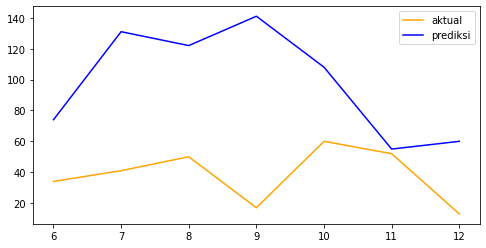

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-230-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-230-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_ka,qty_pred,ad,ape
17,6,2021,17,34,74,40,117.65
18,7,2021,18,41,131,90,219.51
19,8,2021,19,50,122,72,144.00
20,9,2021,20,17,141,124,729.41
21,10,2021,21,60,108,48,80.00
22,11,2021,22,52,55,3,5.77
23,12,2021,23,13,60,47,361.54


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 60.57
MAPE : 236.84


## obor sulut


In [ ]:
df_os = df[['bulan','tahun','indeks_waktu','qty_os']]
df_os

,bulan,tahun,indeks_waktu,qty_os
0,1,2020,0,17
1,2,2020,1,5
2,3,2020,2,9
3,4,2020,3,16
4,5,2020,4,8
5,6,2020,5,7
6,7,2020,6,5
7,8,2020,7,10
8,9,2020,8,9
9,10,2020,9,3


In [ ]:
X = df_os['indeks_waktu'].values
Y = df_os['qty_os'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.8461538461538463,
 0.5274725274725275,
 0.7912087912087913,
 1.8461538461538463,
 0.9230769230769231,
 0.9230769230769231,
 0.5274725274725275,
 0.7912087912087913,
 0.7912087912087913,
 1.8461538461538463,
 0.8571428571428572,
 0.32967032967032966]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

10.764705882352942
-0.33088235294117646


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[5.139705882352942,
 4.808823529411765,
 4.47794117647059,
 4.147058823529413,
 3.8161764705882364,
 3.4852941176470598,
 3.154411764705883]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[5, 3, 4, 3, 7, 3, 1]

In [ ]:
df_test = df_os[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-239-3cc72ee2a3a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_os,qty_pred
17,6,2021,17,7,5
18,7,2021,18,3,3
19,8,2021,19,2,4
20,9,2021,20,3,3
21,10,2021,21,25,7
22,11,2021,22,2,3
23,12,2021,23,2,1


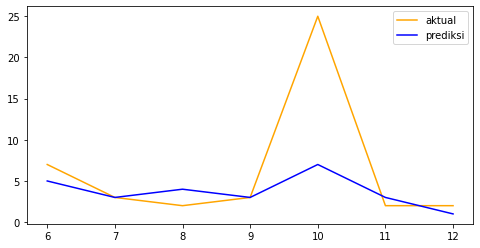

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-241-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-241-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_os,qty_pred,ad,ape
17,6,2021,17,7,5,2,28.57
18,7,2021,18,3,3,0,0.00
19,8,2021,19,2,4,2,100.00
20,9,2021,20,3,3,0,0.00
21,10,2021,21,25,7,18,72.00
22,11,2021,22,2,3,1,50.00
23,12,2021,23,2,1,1,50.00


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 3.43
MAPE : 42.94


## sekop api


In [ ]:
df_sa = df[['bulan','tahun','indeks_waktu','qty_sa']]
df_sa

,bulan,tahun,indeks_waktu,qty_sa
0,1,2020,0,120
1,2,2020,1,36
2,3,2020,2,27
3,4,2020,3,36
4,5,2020,4,35
5,6,2020,5,4
6,7,2020,6,61
7,8,2020,7,82
8,9,2020,8,52
9,10,2020,9,24


In [ ]:
X = df_sa['indeks_waktu'].values
Y = df_sa['qty_sa'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.9739217652958878,
 0.7823470411233702,
 0.5536609829488466,
 0.6379137412236711,
 1.0471414242728185,
 1.925777331995988,
 1.2758274824473421,
 1.0832497492477433,
 1.5646940822467403,
 0.49348044132397195,
 0.21664994984954866,
 0.44533600802407225]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

55.725490196078425
-2.142156862745098


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[19.30882352941176,
 17.166666666666664,
 15.02450980392156,
 12.882352941176464,
 10.740196078431367,
 8.59803921568627,
 6.455882352941174]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[37, 22, 16, 20, 5, 2, 3]

In [ ]:
df_test = df_sa[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-250-ccc9c5156fd9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_sa,qty_pred
17,6,2021,17,156,37
18,7,2021,18,45,22
19,8,2021,19,8,16
20,9,2021,20,78,20
21,10,2021,21,17,5
22,11,2021,22,6,2
23,12,2021,23,31,3


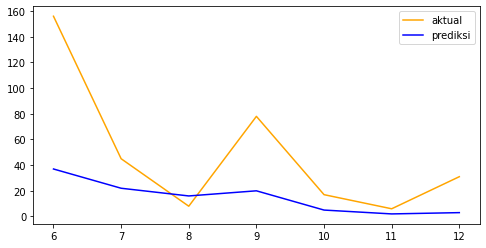

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-252-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-252-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_sa,qty_pred,ad,ape
17,6,2021,17,156,37,119,76.28
18,7,2021,18,45,22,23,51.11
19,8,2021,19,8,16,8,100.00
20,9,2021,20,78,20,58,74.36
21,10,2021,21,17,5,12,70.59
22,11,2021,22,6,2,4,66.67
23,12,2021,23,31,3,28,90.32


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 36.0
MAPE : 75.62


# dummy a


In [ ]:
df_dummy_a = df[['bulan','tahun','indeks_waktu','qty_dummy_a']]
df_dummy_a

,bulan,tahun,indeks_waktu,qty_dummy_a
0,1,2020,0,104
1,2,2020,1,108
2,3,2020,2,103
3,4,2020,3,105
4,5,2020,4,104
5,6,2020,5,102
6,7,2020,6,107
7,8,2020,7,110
8,9,2020,8,102
9,10,2020,9,105


In [ ]:
X = df_dummy_a['indeks_waktu'].values
Y = df_dummy_a['qty_dummy_a'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.0003969829297341,
 1.0242159587137754,
 0.9908693926161175,
 0.9956331877729258,
 0.9765780071456928,
 1.0051607780865424,
 1.019452163556967,
 1.0242159587137754,
 0.9718142119888845,
 0.9908693926161175,
 1.0385073441842,
 0.962286621675268]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

105.41176470588235
-0.051470588235294115


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[104.53676470588235,
 104.48529411764706,
 104.43382352941175,
 104.38235294117646,
 104.33088235294117,
 104.27941176470588,
 104.22794117647058]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[105, 107, 107, 101, 103, 108, 100]

In [ ]:
df_test = df_dummy_a[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-261-2dd842d719a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_dummy_a,qty_pred
17,6,2021,17,109,105
18,7,2021,18,107,107
19,8,2021,19,105,107
20,9,2021,20,102,101
21,10,2021,21,103,103
22,11,2021,22,108,108
23,12,2021,23,100,100


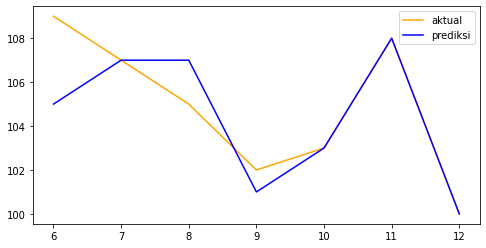

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-263-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-263-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_dummy_a,qty_pred,ad,ape
17,6,2021,17,109,105,4,3.67
18,7,2021,18,107,107,0,0.00
19,8,2021,19,105,107,2,1.90
20,9,2021,20,102,101,1,0.98
21,10,2021,21,103,103,0,0.00
22,11,2021,22,108,108,0,0.00
23,12,2021,23,100,100,0,0.00


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 1.0
MAPE : 0.94


# dummy b


In [ ]:
df_dummy_b = df[['bulan','tahun','indeks_waktu','qty_dummy_b']]
df_dummy_b

,bulan,tahun,indeks_waktu,qty_dummy_b
0,1,2020,0,110
1,2,2020,1,109
2,3,2020,2,108
3,4,2020,3,106
4,5,2020,4,104
5,6,2020,5,102
6,7,2020,6,102
7,8,2020,7,101
8,9,2020,8,100
9,10,2020,9,99


In [ ]:
X = df_dummy_b['indeks_waktu'].values
Y = df_dummy_b['qty_dummy_b'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.074315514993481,
 1.0638852672750978,
 1.0482398956975227,
 1.032594524119948,
 1.0117340286831813,
 1.001303780964798,
 0.9960886571056062,
 0.9804432855280313,
 0.970013037809648,
 0.9595827900912647,
 0.9387222946544981,
 0.9230769230769231]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

109.52941176470588
-1.1911764705882353


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[89.27941176470588,
 88.08823529411765,
 86.89705882352942,
 85.70588235294117,
 84.51470588235294,
 83.32352941176471,
 82.13235294117646]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[89, 88, 85, 83, 81, 78, 76]

In [ ]:
df_test = df_dummy_b[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-272-58c0a172c0a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_dummy_b,qty_pred
17,6,2021,17,90,89
18,7,2021,18,89,88
19,8,2021,19,87,85
20,9,2021,20,86,83
21,10,2021,21,85,81
22,11,2021,22,83,78
23,12,2021,23,81,76


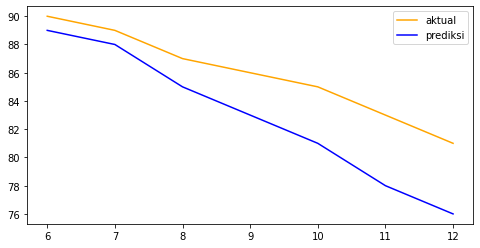

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-274-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-274-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_dummy_b,qty_pred,ad,ape
17,6,2021,17,90,89,1,1.11
18,7,2021,18,89,88,1,1.12
19,8,2021,19,87,85,2,2.30
20,9,2021,20,86,83,3,3.49
21,10,2021,21,85,81,4,4.71
22,11,2021,22,83,78,5,6.02
23,12,2021,23,81,76,5,6.17


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 3.0
MAPE : 3.56


# dummy c


In [ ]:
df_dummy_c = df[['bulan','tahun','indeks_waktu','qty_dummy_c']]
df_dummy_c

,bulan,tahun,indeks_waktu,qty_dummy_c
0,1,2020,0,201
1,2,2020,1,199
2,3,2020,2,198
3,4,2020,3,195
4,5,2020,4,174
5,6,2020,5,172
6,7,2020,6,172
7,8,2020,7,149
8,9,2020,8,148
9,10,2020,9,146


In [ ]:
X = df_dummy_c['indeks_waktu'].values
Y = df_dummy_c['qty_dummy_c'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim.to_excel('Indeks musim.xlsx', index = False)
indeks_musim

[1.1614088820826953,
 1.1540581929555898,
 1.143032159264931,
 1.1209800918836141,
 1.0401225114854518,
 1.0290964777947933,
 1.0290964777947933,
 0.9335375191424197,
 0.8747320061255743,
 0.860030627871363,
 0.8416539050535988,
 0.8122511485451762]

In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

205.09803921568627
-6.519607843137255


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[94.26470588235294,
 87.74509803921569,
 81.22549019607843,
 74.70588235294119,
 68.18627450980392,
 61.66666666666666,
 55.14705882352942]

In [ ]:
Y_pred_final = prediksi_im(Y_pred, indeks_musim2)
Y_pred_final

[97, 90, 76, 65, 59, 52, 45]

In [ ]:
df_test = df_dummy_c[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test.to_excel('Hasil Prediksi test tanpa eval.xlsx', index = False)
df_test

<ipython-input-283-81f5df3ce080>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,bulan,tahun,indeks_waktu,qty_dummy_c,qty_pred
17,6,2021,17,108,97
18,7,2021,18,108,90
19,8,2021,19,105,76
20,9,2021,20,90,65
21,10,2021,21,88,59
22,11,2021,22,85,52
23,12,2021,23,81,45


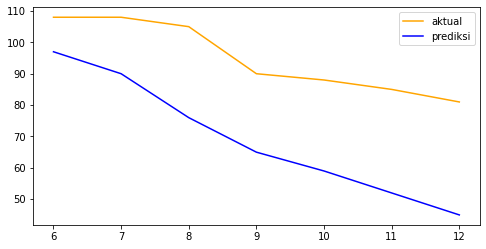

In [ ]:
# plotting perbandingan hasil aktual dan prediksi
X = df_test['bulan']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval.to_excel('Hasil Prediksi test dengan eval.xlsx', index = False)
df_test_eval

<ipython-input-285-6cdf0fb06453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-285-6cdf0fb06453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,bulan,tahun,indeks_waktu,qty_dummy_c,qty_pred,ad,ape
17,6,2021,17,108,97,11,10.19
18,7,2021,18,108,90,18,16.67
19,8,2021,19,105,76,29,27.62
20,9,2021,20,90,65,25,27.78
21,10,2021,21,88,59,29,32.95
22,11,2021,22,85,52,33,38.82
23,12,2021,23,81,45,36,44.44


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 25.86
MAPE : 28.35


# Electric production
[Dataset Electric](https://www.kaggle.com/datasets/shenba/time-series-datasets)


In [ ]:
df_electric = pd.read_csv('Electric_Production.csv')
df_electric.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df_electric2y = df_electric[0:24]
df_electric2y.columns = ['date','electric_utilities']
df_electric2y

,date,electric_utilities
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


In [ ]:
df_electric2y['indeks_waktu'] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
df_electric2y = df_electric2y[['date','indeks_waktu','electric_utilities']]
df_electric2y

<ipython-input-289-1bced55bfa3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric2y['indeks_waktu'] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]


,date,indeks_waktu,electric_utilities
0,1/1/1985,0,72.5052
1,2/1/1985,1,70.6720
2,3/1/1985,2,62.4502
3,4/1/1985,3,57.4714
4,5/1/1985,4,55.3151
5,6/1/1985,5,58.0904
6,7/1/1985,6,62.6202
7,8/1/1985,7,63.2485
8,9/1/1985,8,60.5846
9,10/1/1985,9,56.3154


In [ ]:
X = df_electric2y['indeks_waktu'].values
Y = df_electric2y['electric_utilities'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim

,0
0,1.167650
1,1.110377
2,0.998372
3,0.916947
4,0.889916
5,0.944868
6,1.028109
7,1.022859
8,0.973650
9,0.911688


In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

64.25848039215684
-0.2209181372548992


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[60.502872058823556,
 60.28195392156866,
 60.06103578431376,
 59.840117647058854,
 59.619199509803956,
 59.39828137254906,
 59.17736323529416]

In [ ]:
def prediksi_im_electric(Y_pred, im):
  Y_pred_final=[]
  for i in range(7):
    Y_pred_final.append(round(Y_pred[i]*im[i],4))
  return Y_pred_final

Y_pred_final = prediksi_im_electric(Y_pred, indeks_musim2)
Y_pred_final

[57.1672, 61.9764, 61.434, 58.2633, 54.3541, 55.815, 64.8519]

In [ ]:
df_test = df_electric2y[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test

<ipython-input-296-eeb9dda3d925>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,date,indeks_waktu,electric_utilities,qty_pred
17,6/1/1986,17,59.9005,57.1672
18,7/1/1986,18,65.7655,61.9764
19,8/1/1986,19,64.4816,61.4340
20,9/1/1986,20,61.0005,58.2633
21,10/1/1986,21,57.5322,54.3541
22,11/1/1986,22,59.3417,55.8150
23,12/1/1986,23,68.1354,64.8519


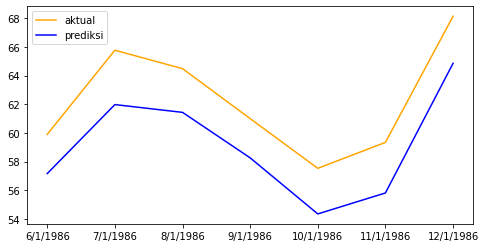

In [ ]:
X = df_test['date']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval

<ipython-input-298-4d1cd2577df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-298-4d1cd2577df3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,date,indeks_waktu,electric_utilities,qty_pred,ad,ape
17,6/1/1986,17,59.9005,57.1672,2.7333,4.56
18,7/1/1986,18,65.7655,61.9764,3.7891,5.76
19,8/1/1986,19,64.4816,61.4340,3.0476,4.73
20,9/1/1986,20,61.0005,58.2633,2.7372,4.49
21,10/1/1986,21,57.5322,54.3541,3.1781,5.52
22,11/1/1986,22,59.3417,55.8150,3.5267,5.94
23,12/1/1986,23,68.1354,64.8519,3.2835,4.82


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 3.19
MAPE : 5.12


# Mobil
[Dataset Mobil](https://www.kaggle.com/code/mcarujo/time-series-car-sales-norway)


In [ ]:
df_mobil = pd.read_csv('norway_new_car_sales_by_make.csv')
df_mobil.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [ ]:
car = df_mobil[df_mobil['Make']=='Jeep']
car24 = car[0:24]
car24['indeks_waktu'] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
car24 = car24[['Year','Month','indeks_waktu','Quantity']]
car24

<ipython-input-301-59404e5197bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car24['indeks_waktu'] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]


,Year,Month,indeks_waktu,Quantity
32,2007,1,0,2
67,2007,2,1,6
98,2007,3,2,33
143,2007,4,3,10
174,2007,5,4,72
210,2007,6,5,68
249,2007,7,6,56
288,2007,8,7,51
327,2007,9,8,34
365,2007,10,9,52


In [ ]:
X = car24['indeks_waktu'].values
Y = car24['Quantity'].values
rata = np.mean(Y)

In [ ]:
Y1 = Y[:12]
Y2 = Y[12:]
indeks_musim = im(Y1,Y2,rata)
indeks_musim2 = indeks_musim[-7:]
df_indeks_musim = pd.DataFrame(indeks_musim)
df_indeks_musim

,0
0,0.536137
1,0.709593
2,0.961892
3,0.693824
4,1.529566
5,1.371879
6,1.434954
7,1.166886
8,0.914586
9,0.977661


In [ ]:
X_train = X[:-7]
Y_train = Y[:-7]
X_test = X[-7:]
Y_test = Y[-7:]

In [ ]:
# nilai a dan b train
b_train = B(X_train, Y_train) 
a_train = A(X_train, Y_train, b_train)
print(a_train)
print(b_train)

32.3921568627451
0.5906862745098039


In [ ]:
Y_pred = prediksi(X_test,a_train,b_train)
Y_pred

[42.43382352941176,
 43.02450980392157,
 43.61519607843137,
 44.205882352941174,
 44.79656862745098,
 45.38725490196079,
 45.97794117647059]

In [ ]:
def prediksi_im_electric(Y_pred, im):
  Y_pred_final=[]
  for i in range(7):
    Y_pred_final.append(round(Y_pred[i]*im[i]))
  return Y_pred_final

Y_pred_final = prediksi_im_electric(Y_pred, indeks_musim2)
Y_pred_final

[58, 62, 51, 40, 44, 39, 38]

In [ ]:
df_test = car24[-7:]
ad = []
ape = []
for l in range(7):
  ad.append(np.abs(Y_test[l]-Y_pred_final[l]))
  ape.append(round(np.abs((Y_test[l]-Y_pred_final[l])/Y_test[l]*100), 2))
df_test['qty_pred'] = Y_pred_final
df_test

<ipython-input-308-71a4828928ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['qty_pred'] = Y_pred_final


,Year,Month,indeks_waktu,Quantity,qty_pred
681,2008,6,17,19,58
720,2008,7,18,35,62
762,2008,8,19,23,51
798,2008,9,20,24,40
841,2008,10,21,10,44
876,2008,11,22,9,39
914,2008,12,23,10,38


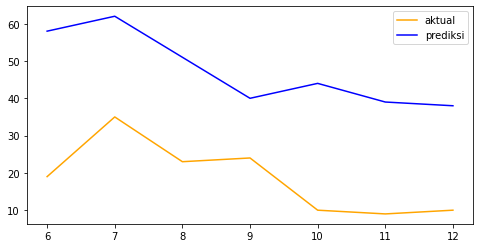

In [ ]:
X = df_test['Month']
y1 = Y[-7:]
y2 = Y_pred_final
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, y1, color='orange', label='aktual')
ax.plot(X, y2, color='blue', label='prediksi')
plt.legend(loc='best')
plt.show()

In [ ]:
df_test_eval = df_test
df_test_eval['ad'] = ad
df_test_eval['ape'] = ape
df_test_eval

<ipython-input-310-4d1cd2577df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ad'] = ad
<ipython-input-310-4d1cd2577df3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval['ape'] = ape


,Year,Month,indeks_waktu,Quantity,qty_pred,ad,ape
681,2008,6,17,19,58,39,205.26
720,2008,7,18,35,62,27,77.14
762,2008,8,19,23,51,28,121.74
798,2008,9,20,24,40,16,66.67
841,2008,10,21,10,44,34,340.00
876,2008,11,22,9,39,30,333.33
914,2008,12,23,10,38,28,280.00


In [ ]:
evaluasi = eval(Y_test,Y_pred_final)
evaluasi

MAD : 28.86
MAPE : 203.45
